In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/MyDrive


'archive.zip (Unzipped Files)'			       IMG_20181130_205111.jpg
 Biomedical-Engineering-cv.gdoc			       IMG_20181130_215802.jpg
'Certificate of Participation - Sara Ghahremany.pdf'   IMG_20181221_121511.jpg
 ChurnData.gsheet				       IMG_20181221_121549.jpg
 Classroom					       IMG_20181221_125727.jpg
'Colab Notebooks'				       IMG_20181221_125745.jpg
 cpp.pdf					       IMG_20181221_125751.jpg
 datasets					       IMG_20181221_141705.jpg
 drug200.gsheet					       IMG_20181221_141720.jpg
 Ecg.pdf					       IMG_20181221_211831.jpg
 FuelConsumptionCo2.gsheet			       IMG_20181221_211834.jpg
 fvpht9407b_wd98ks72yef0_www.faradars.org.rar	       IMG_20181221_211848.jpg
 fvpht9407g_qvfgws76w8sy_www.faradars.org.rar	       IMG_20181221_212537.jpg
 fvpht9407v_4ein8av68g4p_www.faradars.org.rar	       IMG_20181221_212546.jpg
 habits.gdoc					       IMG_20181221_212620.jpg
 heart_attack_model.pkl				       IMG_20181221_212628.jpg
 heart_attack_project				      'Monthly budget.gsheet'
 Heart

In [4]:
file_path = "/content/drive/MyDrive/HeartDataSet.csv"  # Update if the path is different
df = pd.read_csv(file_path)

# Display the first few rows
df.head(100)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


In [5]:
df.dropna(inplace=True)

In [6]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [7]:
if 'target' in df.columns:
    X = df.drop(columns=['target'])
    y = df['target']
else:
    print("Error: 'target' column not found in dataset.")


Error: 'target' column not found in dataset.


In [8]:
# 3. Feature selection
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

In [9]:
# 4. Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# 5. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# 6. Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# 7. Predictions
y_pred = model.predict(X_test)

In [13]:
# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



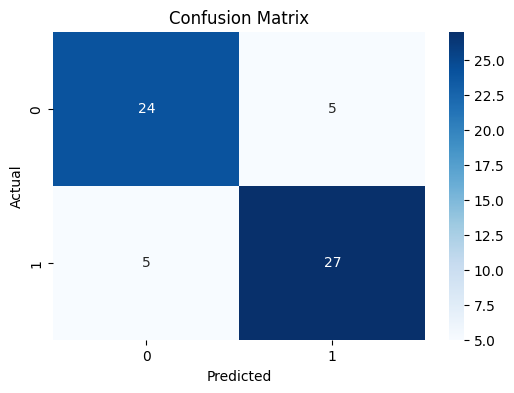

In [14]:
# 9. Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
import joblib

# Save the trained model
joblib.dump(model, 'heart_attack_model.pkl')


['heart_attack_model.pkl']

In [16]:
# Save the scaler (important for input normalization)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [17]:
!ls

drive  heart_attack_model.pkl  sample_data  scaler.pkl


In [18]:
drive_path = "/content/drive/MyDrive/"

# Save the trained model to Google Drive
joblib.dump(model, drive_path + 'heart_attack_model.pkl')

# Save the scaler (important for input normalization)
joblib.dump(scaler, drive_path + 'scaler.pkl')

print("Model and scaler saved in Google Drive!")

Model and scaler saved in Google Drive!
